# Statistical Models For Fading Channels

In mobile communication system modeling, the knowledge of statistical properties of the received signal’s
envelope is also important. For a frequency-flat fading channel, the received signal can be simply modeled
by multiplying the transmitted signal with a suitably chosen stochastic process. Depending on the absence or
presence of a line-of-sight path between the transmitter and the receiver, we can choose Rayleigh process or
Rice process for modeling the envelope of the receiver signal.

If a signal is transmitted over a frequency-flat channel, the received signal is expressed as a sum of all
incident waves. In complex baseband equivalent model, the received signal is described as the sum of all
scattered components and the line-of-signal component.

## The Rayleigh Process

### The Complex Gaussian Model

The sum of all scattered components gives rise to a zero-mean complex Gaussian random process

$$\mu(t) = \mu_i(t) + j \mu_q(t)$$

where, $\mu_i(t)$ and $\mu_q(t)$ are statistically uncorrelated real-valued colored Gaussian random processes with variance equal to $\sigma_0^2$

In [1]:
import numpy as np
import matplotlib, matplotlib.pyplot as plt

print('Matplotlib', matplotlib.__version__)
print('NumPy', np.__version__)

Matplotlib 3.7.2
NumPy 1.23.3


In [2]:
#generating and plotting one instant of a Rayleigh process
from scipy.stats import multivariate_normal

#defining complex Gaussian parameters
mean = np.array([0,0])
cov = np.eye(2) * 5

#defining domain
x = np.linspace(-10, 10, 500)  
y = np.linspace(-10, 10, 500)  
X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))

#create a multivariate normal distribution using the defined parameters
rv = multivariate_normal(mean, cov)

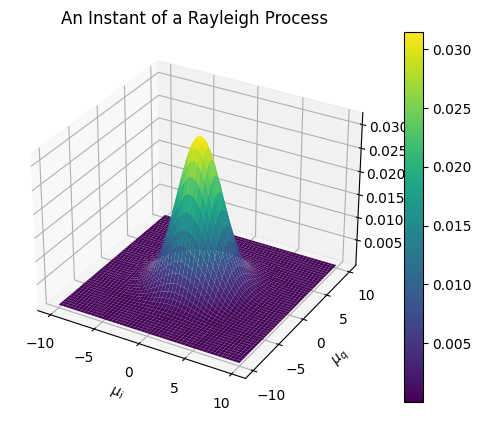

In [3]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis')

fig.colorbar(surf)
plt.title('An Instant of a Rayleigh Process')
ax.set_xlabel(r'$\mu_i$')
ax.set_ylabel(r'$\mu_q$')  
plt.show()

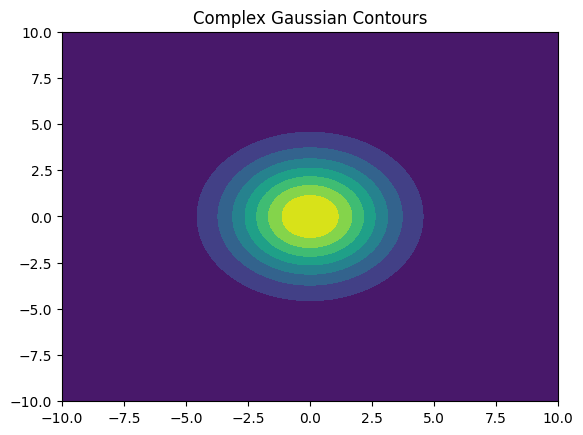

In [4]:
#generating a contour plot
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, rv.pdf(pos))

plt.title('Complex Gaussian Contours')
ax.set_xlabel(r'$\mu_i$')
ax.set_ylabel(r'$\mu_q$') 
plt.show()

### The Rayleigh Distribution

The envelope of a complex Gaussian random process is a Rayleigh process.

$$\zeta(t) = |\mu(t)| = |\mu_i(t) + j\mu_q(t)|$$

For the generic Rayleigh process $\zeta(t)$, the probability density function of the received signal
amplitude is given by the Rayleigh distribution 

$$f_R(|\zeta(t)|) = f_R(r) = \frac{r}{\sigma_h^2} \exp\left(-\frac{r^2}{2\sigma_h^2}\right)$$

In [48]:
#defining a Theoretical Rayleigh PDF
s = 1.5 #sigma of individual gaussian rvs (real & imaginary parts)
r = np.arange(0,10,0.1)
pdf = ( r / (s**2)) * np.exp((- (r ** 2)) / (2*(s**2))) #theoretical pdf

In [68]:
#generating a Rayleigh Random Variable 
h = abs(s * (np.random.randn(1,100000) + (1j * (np.random.randn(1,100000)))))

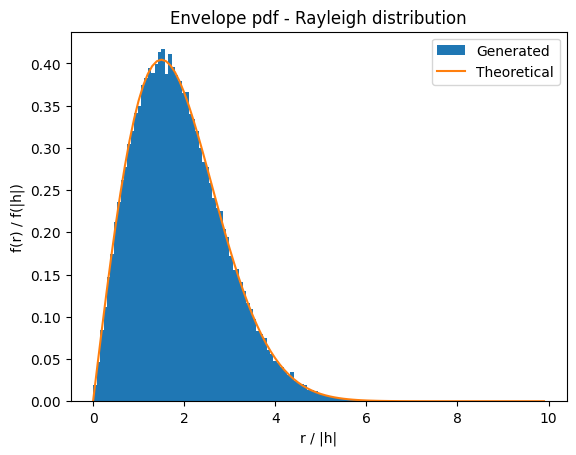

In [69]:
#plotting theoretical vs. generated
plt.figure()

plt.hist(h.flatten(), bins=len(r), density=True, label='Generated')
plt.plot(r, pdf, label='Theoretical')
plt.title('Envelope pdf - Rayleigh distribution')
plt.xlabel('r / |h|')
plt.ylabel('f(r) / f(|h|)')
plt.legend()

plt.show()

### Modelling a Frequency-Flat Rayleigh Distributed Wireless Fading Channel

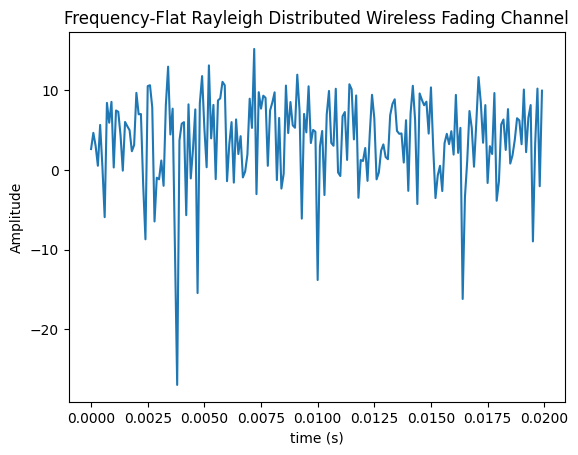

In [97]:
num_samples = 200
Ts = 0.0001
t = Ts * np.arange(0, num_samples)

#generating a Rayleigh Random Variable 
h = abs(s * (np.random.randn(1,num_samples) + (1j * (np.random.randn(1,num_samples)))))

plt.figure()

plt.plot(t, 20*np.log10(h.flatten()))

plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('Frequency-Flat Rayleigh Distributed Wireless Fading Channel')
plt.show()

## The Rician Process

### A Mean-Shifted Complex Gaussian

The Rayleigh process descirbes a multipath fading channel with no dominant Line-of-Sight (LoS) Component. 

The more generic case would be a superpositions of scattered Non-LoS components plus a dominant LoS component.

The line-of-sight component of the received signal is described by a general time-variant complex random
process

$$m(t) = m_i(t) + jm_q(t)$$

Therefore, the superposition of both the scattered and the line-of-sight components is described
by adding equation:

$$\mu_\rho(t) = \mu(t) + m(t)$$

Which renders an instant of the rician process a complex gaussian with a shifted mean

In [72]:
#generating and plotting one instant of a Rician process

#defining complex Gaussian parameters
mean = np.array([5,5])
cov = np.eye(2) * 5

#defining domain
x = np.linspace(-20, 20, 500)  
y = np.linspace(-20, 20, 500)  
X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))

#create a multivariate normal distribution using the defined parameters
rv = multivariate_normal(mean, cov)

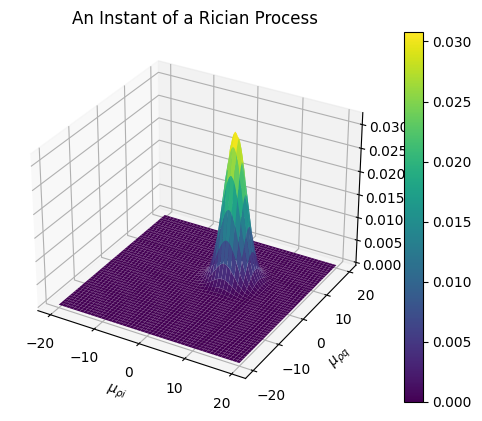

In [79]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis')

fig.colorbar(surf)
plt.title('An Instant of a Rician Process')
ax.set_xlabel(r'$\mu_{\rho i}$')
ax.set_ylabel(r'$\mu_{\rho q}$')  
plt.show()

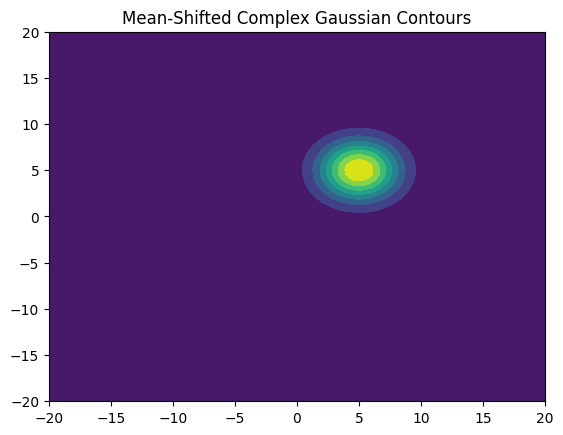

In [78]:
#generating a contour plot
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, rv.pdf(pos))

plt.title('Mean-Shifted Complex Gaussian Contours') 
plt.show()

### The Rician Distribution

The envelope process for this generic case is a Rice proces

$$\zeta(t) = |\mu_{p}(t)| = |\mu(t)| + m(t)$$


For the generic Rice process ξ (t), the probability density function of the received signal amplitude is given by the Rice distribution 

$$p_{\xi}(x) = 
\begin{cases} 
\frac{x}{\sigma_0^2} e^{-\frac{x^2 + \rho^2}{2\sigma_0^2}} I_0\left(\frac{x\rho}{\sigma_0^2}\right), & x \geq 0 \\
0, & x < 0
\end{cases}$$

In the context of Rice distribution, the Ricean K factor, denoted by κ, captures the ratio of power of line-ofsight component and the sum of power of all the scattered components.

$$\kappa = \frac{E\left[ m(t)^2 \right]}{E\left[ \mu(t)^2 \right]} = \frac{\rho^2}{2\sigma_0^2}$$

If ρ → 0, i.e, κ → 0, the Rice process becomes a Rayleigh process, whose amplitude variations are statistically
described by Rayleigh distribution.

And as ρ increases, the distribution approaches a Gaussian.

A Ricean statistical channel model for flat-fading can be described by two parameters: Ω and κ. Ω = $\rho^2 + \sigma_0^2$
is the total power from line-of-sight path and scattered paths, and κ is ratio of powers in the line-ofsight path and the scattered path as described by equation

An alternative parametrization for the Rician distribution could be given in terms of $\Omega$ and $\kappa$ as follows:

$$p_{\xi}(x) = \frac{2x(K + 1)}{\Omega} \exp\left( -\frac{(K + 1)x^2}{\Omega} - K \right) I_0\left(2x\sqrt{\frac{K(K + 1)}{\Omega}}\right), \quad x \geq 0, \, K \geq 0, \, \Omega \geq 0$$

A simple Ricean fading channel can be simulated by setting the variables g1 and g2, as follows:

$$\begin{align}
g_1 &= \sqrt{\frac{K}{2(1+K)}}, \\
g_2 &= \frac{1}{\sqrt{2(1+K)}}
\end{align}
$$

In [80]:
from scipy.special import iv #Modified Bessel function of the first kind of real order

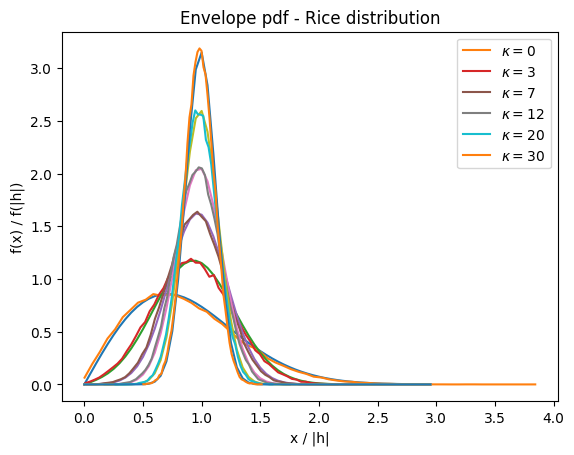

In [89]:
#generating theoretical & egenrated Rician distributions with different parameters
num_samples = 100000
omega=1 #Total average power set to unity
K_factors = [0, 3, 7, 12, 20, 30]

x = np.arange(0,3,0.05)

plt.figure()

for K in K_factors:
    #compute theoretical distribution
    z = 2 * x * np.sqrt((K*(K+1))/omega) #to generate modified Bessel function
    I0 = iv(0, z)
    rice_pdf = ((2*x*(K+1)) / omega) * np.exp(-K - ( ((x**2)*(K+1)) / omega)) * I0

    #generating a Rician Random Variable
    g1 = np.sqrt(K/(2*(K+1)))
    g2 = np.sqrt(1/(2*(K+1)))

    r = abs((g2*np.random.randn(1,num_samples)+g1) + (1j * (g2*np.random.randn(1,num_samples)+g1)))
    vals, bins = np.histogram(r.flatten(), bins=len(x), density=True)

    #plotting theoretical vs. generated
    plt.plot(x, rice_pdf)
    plt.plot(bins[:-1], vals, label=f'$\kappa = {K}$')

plt.legend()
plt.title('Envelope pdf - Rice distribution')
plt.xlabel('x / |h|')
plt.ylabel('f(x) / f(|h|)')
plt.show()

### Modelling a Frequency-Flat Rice Distributed Wireless Fading Channel

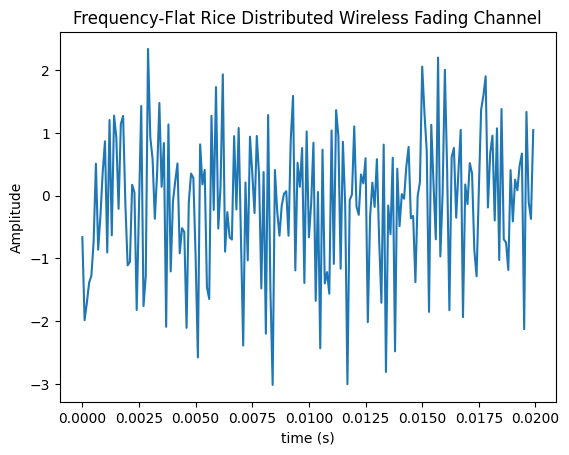

In [96]:
num_samples = 200
Ts = 0.0001
t = Ts * np.arange(0, num_samples)

#generating a Rician Random Variable
g1 = np.sqrt(K/(2*(K+1)))
g2 = np.sqrt(1/(2*(K+1)))

h = abs((g2*np.random.randn(1,num_samples)+g1) + (1j * (g2*np.random.randn(1,num_samples)+g1)))

plt.figure()

plt.plot(t, 20*np.log10(h.flatten()))

plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('Frequency-Flat Rice Distributed Wireless Fading Channel')
plt.show()

## The Nakagami-m Process